# Value at risk 
## Adrián Vázquez 
### 04/09/21

- un componente clave de la gestión de riesgos de la cartera es poder definir el riesgo.

- Es importante la capacidad de cuantificar las pérdidas potenciales en una sola acción y nivel de cartera

<b> El riesgo de cola </b>

- Es esencialmente el riesgo de resultados extremos  en la cola de retorno distribución, particularmente en la cola izquierda, lo que significa un retorno extremadamente negativo

<b> La reducción historica es una forma de estimar la perdida potencial desde el punto mas alto. En otras palabras ¿que tan lejos has caido de tu mejor momento en la historia? </b>

# El valor de riesgo (VaR)

- Es una forma de estimar el riesgo de un movimiento de precios negativo en un solo dia. 
- El VaR siempre tiene un cuantil o porcentaje que se le atribuye
   - <B> EJEMPLO. </B>
       - Un VaR(95) = - 2.3%. Significa que en el peor de los escenarios, mis perdidas superaran el -2.3%. 
       Quiere decir que puedo estar un 95 % que mis perdidas no superan el -2.3% en un dia determinado. 

# El valor de riesgo condicional (CVaR)
- El CVaR es una medida del valor de las pérdidas en el peor escenario.
     - <B> EJEMPLO. </B>
        - CVaR(95) = -2.5 % significa que en el peor de los 100- 95 % escenarios o el peor 5% de los casos, las perdidas promedio son -2.5%. 

Esto es escencialmente lo mismo que tomar el promedio de pérdidas que excede el nivel de VaR(95)


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
StockReturns = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/dfe9da08c986709d59943d1d5c0106537a8c608a/USO.csv')

In [17]:
StockReturns.head()

,Date,USO
0,2007-01-03,-0.042636
1,2007-01-04,-0.040688
2,2007-01-05,0.009285
3,2007-01-08,-0.007109
4,2007-01-09,-0.004001


### Historical value at risk

- Drawdown is a measure of sustained losses over time, but what about simple single-day movements?

- Value at Risk, often referred to as VaR, is a way to estimate the risk of a single day negative price movement. VaR can be measured for any given probability, or confidence level, but the most commonly quoted tend to be VaR(95) and VaR(99). Historical VaR is the simplest method to calculate VaR, but relies on historical returns data which may not be a good assumption of the future. Historical VaR(95), for example, represents the minimum loss that your portfolio or asset has sustained in the worst 5% of cases.

- Below, you will calculate the historical VaR(95) of the USO oil ETF. 

<b> EXERCISE </b>

- Calculate VaR(95), the worst 5% of USO returns (StockReturns_perc), and assign it to var_95.

- Sort StockReturns_perc and assign it to sorted_rets.

- Plot the histogram of sorted returns (sorted_rets).

In [30]:
# Calculate historical VaR(95)
var_95 = np.percentile(StockReturns_perc, 5)
print(var_95)
# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)
# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, normed=True)
# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'

## Historical expected shortfall

- Expected Shortfall, otherwise known as CVaR, or conditional value at risk, is simply the expected loss of the worst case scenarios of returns.
   - For example, if your portfolio has a VaR(95) of -3%, then the CVaR(95) would be the average value of all losses exceeding -3%.

- Returns data is available (in percent) in the variable StockReturns_perc. var_95 from the previous exercise is also available in your workspace.

<b> EXERCISE </b>

- Calculate the average of returns in StockReturns_perc where StockReturns_perc is less than or equal to var_95 and assign it to cvar_95.

- Plot the histogram of sorted returns (sorted_rets) using the plt.hist() function.

In [19]:
#Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
print(cvar_95)
# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)
# Plot the probability of each return quantile
plt.hist(sorted_rets, normed=True)
# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

NameError: name 'var_95' is not defined

<B>Conclusion </B>

- Notice how the CVaR(95) of -5.05% was more extreme than the VaR(95) level?

### Changing VaR and CVaR quantiles

- VaR quantiles often used are 90%, 95%, and 99%, corresponding to the worst 10%, 5%, and 1% of cases respectively. These same quantiles are also often used for CVaR. Note that CVaR will always be a more extreme estimate when compared with VaR for the same quantile.

- Compare the VaR vs CVaR values for USO ETF returns below.

<b> We also calculated var_95, cvar_95, var_99, cvar_99 and defined a function plot_hist() that compares several quantiles for you. </b>

- Calculate the VaR(90) for StockReturns_perc and save the result in var_90.
- Calculate the CVaR(90) for StockReturns_perc and save the result in cvar_90.

In [20]:
# Historical VaR(90) quantiles
var_90 = np.percentile(StockReturns_perc, 10)
print(var_90)
# Historical CVaR(90) quantiles
cvar_90 = StockReturns_perc[StockReturns_perc <= var_90].mean()
print(cvar_90)
# Plot to compare
plot_hist()

TypeError: '<' not supported between instances of 'float' and 'str'

<b> Conclusion </b>
The CVaR(90) is -4.04%, which is higher than the VaR(90) of -2.56%.

# Parametric VaR

- Value at Risk can also be computed parametrically using a method known as variance/co-variance VaR. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values. You can calculate the parametric VaR(90) using:

## Import norm from scipy.stats
- from scipy.stats import norm

## Calculate Parametric VaR
 - norm.ppf(confidence_level=0.10, mu, vol)
     - where mu and vol are the mean and volatility, respectively.
       Returns data is available (in decimals) in the variable StockReturns.


- Import norm from scipy.stats.

- Calculate the mean and volatility of StockReturns and assign them to mu and vol, respectively.

- Set the confidence_level for VaR(95).

- Calculate VaR(95) using the norm.ppf() function, passing in the confidence level as the first parameter, with mu and vol as the second and third parameters.

In [21]:
# Import norm from scipy.stats
from scipy.stats import norm
# Estimate the average daily return
mu = np.mean(StockReturns)
# Estimate the daily volatility
vol = np.std(StockReturns)
# Set the VaR confidence level
confidence_level = .05
# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  USO   -0.000286
dtype: float64 
Volatility:  USO    0.021888
dtype: float64 
VaR(95):  [-0.03628909]


<b> Conclusion </b>

- The parametric VaR(95) is -3.63%.

# Scaling risk estimates

- The VaR(95) number calculated in previous exercises is simply the value at risk for a single day. To estimate the VaR for a longer time horizon, scale the value by the square root of time, similar to scaling volatility:


## $ VaR(95)_{t days} = VaR(95)_{1 day} * \sqrt{t}  $

- VaR(95)t days=VaR(95)1 day∗t

- StockReturns_perc and var_95 from the previous exercise is available in your workspace. Use this data to estimate the VaR for the USO oil ETF for 1 to 100 days from now. We've also defined a function plot_var_scale() that plots the VaR for 1 to 100 days from now.

<b>Exercise </b>

- Loop from 0 to 100 (not including 100) using the range() function.

- Set the second column of forecasted_values at each index equal to the forecasted VaR, multiplying var_95 by the square root of i + 1 using the np.sqrt() function.

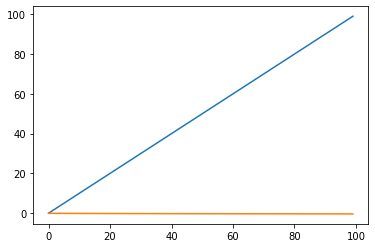

In [29]:
# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])
# Loop through each forecast period
for i in range(100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] =  var_95 * np.sqrt(1+i)
# Plot the results

plt.plot(range(100), forecasted_values)

<b> Conclusion </b>

Notice how the plot resembles a square root?

# random walk simulation

- Stochastic or random movements are used in physics to represent particle and fluid movements, in mathematics to describe fractal behavior, and in finance to describe stock market movements.

- Use the np.random.normal() function to model random walk movements of the USO oil ETF with a constant daily average return (mu) and average daily volatility (vol) over the course of T trading days.

<b> Instructions. </b>

- Set the number of simulated days (T) equal to 252, and the initial stock price (S0) equal to 10.

- Calculate T random normal values using np.random.normal(), passing in mu and vol, and T as parameters, then adding 1 to the values and assign it to rand_rets.

- Calculate the random walk by multiplying rand_rets.cumprod() by the initial stock price and assign it to forecasted_values.

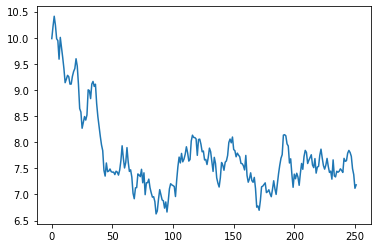

In [26]:
# Set the simulation parameters
mu = np.mean(StockReturns)
vol = np.std(StockReturns)
T = 252
S0 = 10
# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1
# Forecasted random walk
forecasted_values = rand_rets.cumprod()*S0
# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

<b> Conclusion </b>
- You just made your first random walker simulation!

# Monte Carlo simulations

### Monte-Carlo simulations are used to model a wide range of possibilities.
M
- onte-Carlos can be constructed in many different ways, but all of them involve generating a large number of random variants of a given model, allowing a wide distribution of possible paths to be analyzed. This can allow you to build a comprehensive forecast of possibilities to sample from without a large amount of historical data.

- Generate 100 Monte-Carlo simulations for the USO oil ETF.
- The parameters mu, vol, T, and S0 are available from the previous exercise.

<b>Instructions </b>

- Loop from 0 to 100 (not including 100) using the range() function.

- Call the plotting function for each iteration using the plt.plot() function, passing the range of values T (range(T)) as the first argument and the forecasted_values as the second argument.

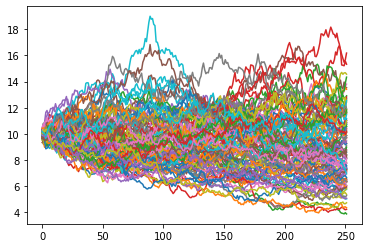

In [27]:
# Loop through 100 simulations
for i in range(100):
    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)
# Show the simulations
plt.show()


# Monte Carlo VaR

- Both the return values and the Monte-Carlo paths can be used for analysis of everything ranging from option pricing models and hedging to portfolio optimization and trading strategies.

- Aggregate the returns data at each iteration, and use the resulting values to forecast parametric VaR(99).

- The parameters mu, vol, T, and S0 are available from the previous exercise.

</b>Instructions </b>

- Use the .append() method to append the rand_rets to sim_returns list in each iteration.

- Calculate the parametric VaR(99) using the np.percentile() function on sim_returns.


In [31]:
# Aggregate the returns
sim_returns = []
# Loop through 100 simulations
for i in range(100):
    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    # Save the results
    sim_returns.append(rand_rets)
# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.08 %


<b> Conclusion </b>

Check the shell to see your simulated VaR(99). What else could you use Monte Carlo simulations for?